# Predict Consumption

### Goal: using the KWH predict consumption

## Approach
1. EDA
2. Cleaning / Tranformations
3. Baseline model
4. Eval model
5. Feature engineering
6. Try different models / combos

### Thoughts
- Should I run a check that all the dtypes in the data file are the same as intended in the 'public_layout' file? Could be a good data quality check to automate for the datapipeline

### Assumptions
- All data appart from taget variable will be aviable to use as features for prediction
- 

### Imports

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

%matplotlib inline

## Data EDA

### Load data

In [103]:
dpath = '../data/'

df1 = pd.read_csv(dpath + 'recs2009_public.csv')
df_lay = pd.read_csv(dpath + "public_layout.csv")
df_w = pd.read_csv(dpath + "recs2009_public_repweights.csv")

### Public File

In [2]:
df1 = pd.read_csv(dpath + 'recs2009_public.csv')

/Users/josephluiz/miniconda3/envs/THIRD_LOVE/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3524: DtypeWarning: Columns (717,718) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
print(df1.shape)
df1.head()

(12083, 940)


,DOEID,REGIONC,DIVISION,REPORTABLE_DOMAIN,TYPEHUQ,NWEIGHT,HDD65,CDD65,HDD30YR,CDD30YR,...,SCALEKER,IECC_Climate_Pub,HDD50,CDD80,GND_HDD65,WSF,OA_LAT,GWT,DesignDBT99,DesignDBT1
0,1,2,4,12,2,2471.68,4742,1080,4953,1271,...,-2,4A,2117,56,4250,0.48,6,56,9,96
1,2,4,10,26,2,8599.17,2662,199,2688,143,...,-2,3C,62,26,2393,0.61,0,64,38,73
2,3,1,1,1,5,8969.92,6233,505,5741,829,...,-2,5A,2346,49,5654,0.48,3,52,12,88
3,4,2,3,7,2,18003.64,6034,672,5781,868,...,-2,5A,2746,0,4941,0.55,4,55,7,87
4,5,1,1,1,3,5999.61,5388,702,5313,797,...,-2,5A,2251,0,5426,0.61,4,50,13,90


In [4]:
df1.describe()

,DOEID,REGIONC,DIVISION,REPORTABLE_DOMAIN,TYPEHUQ,NWEIGHT,HDD65,CDD65,HDD30YR,CDD30YR,...,PERIODKR,SCALEKER,HDD50,CDD80,GND_HDD65,WSF,OA_LAT,GWT,DesignDBT99,DesignDBT1
count,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,...,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000
mean,6042.000000,2.628321,5.373086,14.783663,2.659604,9402.981870,4141.375238,1415.406108,4135.146983,1443.503104,...,-1.935943,-1.955392,1681.961764,139.568485,3763.728544,0.499036,5.656046,59.128693,20.256311,90.359431
std,3488.205986,1.042142,2.859366,8.195824,1.192627,5192.101419,2317.759375,1134.659475,2260.543686,1021.748722,...,0.589907,0.415810,1401.079218,264.186908,2597.754419,0.083520,6.797205,8.678293,15.337626,6.166669
min,1.000000,1.000000,1.000000,1.000000,1.000000,476.100000,0.000000,0.000000,0.000000,0.000000,...,-2.000000,-2.000000,0.000000,0.000000,0.000000,0.310000,0.000000,36.000000,-23.000000,60.000000
25%,3021.500000,2.000000,3.000000,8.000000,2.000000,6297.040000,2197.500000,561.000000,2224.000000,712.000000,...,-2.000000,-2.000000,262.500000,4.000000,1246.500000,0.430000,1.000000,52.000000,9.000000,87.000000
50%,6042.000000,3.000000,5.000000,15.000000,2.000000,7970.630000,4483.000000,1045.000000,4502.000000,1179.000000,...,-2.000000,-2.000000,1684.000000,30.000000,3878.000000,0.500000,3.000000,58.000000,18.000000,90.000000
75%,9062.500000,3.000000,7.000000,21.000000,3.000000,11330.030000,5913.000000,1897.000000,5854.000000,1842.500000,...,-2.000000,-2.000000,2662.000000,117.000000,5834.000000,0.560000,7.000000,66.000000,33.000000,94.000000
max,12083.000000,4.000000,10.000000,27.000000,5.000000,95779.140000,12525.000000,5480.000000,13346.000000,5357.000000,...,5.000000,3.000000,7623.000000,1884.000000,11567.000000,0.800000,34.000000,89.000000,67.000000,118.000000


In [5]:
df1.shape

(12083, 940)

In [6]:
df1.info()
# types: float64(50), int64(885), object(5)
# from the int64 are there ordinal that we shouldnt consider continous when modeling? 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12083 entries, 0 to 12082
Columns: 940 entries, DOEID to DesignDBT1
dtypes: float64(50), int64(885), object(5)
memory usage: 86.7+ MB


#### **Explore Object columns**
5 columns: 
- METROMICRO
- UR
- NOCRCASH
- NKRGALNC
- IECC_Climate_Pub

Pipeline: 
1. Clean text (strip etc)
2. Remove rows with "." 
3. Replace "-2" with 0 
    - "NOCRCASH"  
    - "NKRGALNC" columns
4. Encode
    - "METROMICRO"
    - "UR"
    - "IECC_Climate_Pub"


In [7]:
obj_cols = df1.select_dtypes(include=['object'])
obj_cols.head()

,METROMICRO,UR,NOCRCASH,NKRGALNC,IECC_Climate_Pub
0,METRO,U,-2,-2,4A
1,METRO,U,-2,-2,3C
2,METRO,U,-2,-2,5A
3,METRO,U,-2,-2,5A
4,METRO,U,-2,-2,5A


In [8]:
obj_cols['METROMICRO'].value_counts() 
# encode this


METRO    10302
MICRO     1109
NONE       672
Name: METROMICRO, dtype: int64

In [9]:
obj_cols['UR'].value_counts()
# encode

U    9656
R    2427
Name: UR, dtype: int64

In [10]:
obj_cols['NOCRCASH'].value_counts()
# a string column... but should be numeric.... 
# clean this... and make number (remember -2 sitation)

-2    9958
-2    2028
1       18
3       10
4       10
5        9
2        7
1        6
16       4
12       3
8        3
6        3
4        2
.        2
3        2
24       2
12       2
15       2
55       2
10       1
20       1
40       1
55       1
28       1
6        1
24       1
10       1
20       1
25       1
Name: NOCRCASH, dtype: int64

In [11]:
obj_cols['NKRGALNC'].value_counts()
# Gallons per kerosene 'cash and carry' purchase
# I see common - 2 values... 

# Assumption: if -2 then is customers who are not purchasing gas
# Idea: make anything -2 = 0

# clean this... and make number


-2    9958
-2    2028
5       42
3       11
1       10
10       8
5        5
10       5
1        2
.        2
15       2
8        1
3        1
2        1
77       1
30       1
15       1
8        1
55       1
2        1
20       1
Name: NKRGALNC, dtype: int64

In [12]:
obj_cols['IECC_Climate_Pub'].value_counts()
# encode this!!!

4A               2703
5A               2402
1A-2A            1740
3B-4B            1523
3A               1235
6A-6B             971
5B-5C             476
3C                368
4C                312
2B                209
7A-7B-7AK-8AK     144
Name: IECC_Climate_Pub, dtype: int64

### Objects Pipeline

In [81]:
#0. make now df for cleaned data
df_clean = df1.copy(deep=True)


#1. clean NOCRCASH, NKRGALNC
df_clean['NOCRCASH'] = df_clean['NOCRCASH'].replace(".", 0).astype('int64')
df_clean['NKRGALNC'] = df_clean['NKRGALNC'].replace(".", 0).astype('int64')

#2. encode categorical columns
encoded_cols = pd.get_dummies(df_clean[['METROMICRO', 'UR', 'IECC_Climate_Pub']])
df_clean.drop(['METROMICRO', 'UR', 'IECC_Climate_Pub'], axis=1, inplace=True)
df_clean = pd.concat([df_clean, encoded_cols], axis = 1)



#### Target Variable

<AxesSubplot:>

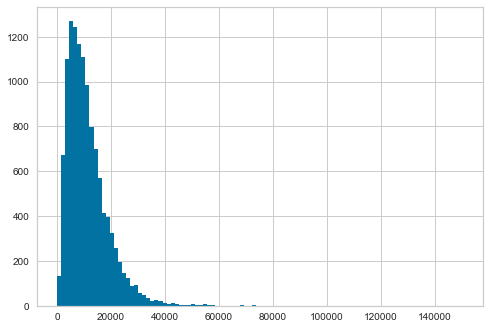

In [86]:
target = df1['KWH']
target.hist(bins=100)

In [14]:
df1['KWH'].describe()

count     12083.000000
mean      11288.159398
std        7641.190845
min          17.000000
25%        5837.000000
50%        9623.000000
75%       14765.000000
max      150254.000000
Name: KWH, dtype: float64

(array([1.330e+02, 6.740e+02, 1.102e+03, 1.270e+03, 1.245e+03, 1.167e+03,
        1.110e+03, 9.830e+02, 7.970e+02, 7.000e+02, 5.700e+02, 4.130e+02,
        3.970e+02, 3.230e+02, 2.570e+02, 1.940e+02, 1.460e+02, 1.240e+02,
        9.000e+01, 9.400e+01, 5.900e+01, 4.700e+01, 3.700e+01, 2.100e+01,
        2.600e+01, 2.000e+01, 1.400e+01, 1.000e+01, 1.200e+01, 8.000e+00,
        4.000e+00, 4.000e+00, 2.000e+00, 6.000e+00, 2.000e+00, 2.000e+00,
        6.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

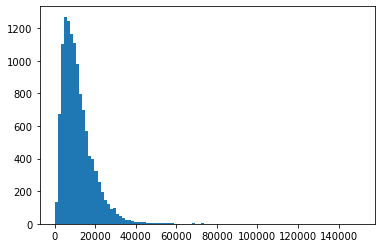

In [15]:
plt.hist(target, bins=100)

In [16]:
# Thoughts... should we remove outliers? 
#             should we normalize to correct skew?



### Column Meanings

In [30]:
# this table shows column headers
df_lay = pd.read_csv(dpath + "public_layout.csv")
df_lay.head()

,Variable Name,Variable Label,Variable Order in File,Variable Type,Length
0,DOEID,Unique identifier for each respondent,1,Character,5
1,REGIONC,Census Region,2,Numeric,8
2,DIVISION,Census Division,3,Numeric,8
3,REPORTABLE_DOMAIN,Reportable states and groups of states,4,Numeric,8
4,TYPEHUQ,Type of housing unit,5,Numeric,8


In [101]:
print(df_lay['Variable Type'].value_counts())

cols_char = df_lay.loc[df_lay['Variable Type'] == 'Character']['Variable Name'].to_list()
cols_char


Numeric      930
Character     10
Name: Variable Type, dtype: int64


['DOEID',
 'METROMICRO',
 'UR',
 'ZTOTSQFT',
 'ZTOTSQFT_EN',
 'ZTOTHSQFT',
 'ZTOTUSQFT',
 'ZTOTCSQFT',
 'ZTOTUCSQFT',
 'IECC_Climate_Pub']

In [93]:
df_lay[:50]

,Variable Name,Variable Label,Variable Order in File,Variable Type,Length
0,DOEID,Unique identifier for each respondent,1,Character,5
1,REGIONC,Census Region,2,Numeric,8
2,DIVISION,Census Division,3,Numeric,8
3,REPORTABLE_DOMAIN,Reportable states and groups of states,4,Numeric,8
4,TYPEHUQ,Type of housing unit,5,Numeric,8
5,NWEIGHT,Final sample weight,6,Numeric,8
6,HDD65,"Heating degree days in 2009, base temperature 65F",7,Numeric,8
7,CDD65,"Cooling degree days in 2009, base temperature 65F",8,Numeric,8
8,HDD30YR,"Heating degree days, 30-year average 1981-2010...",9,Numeric,8
9,CDD30YR,"Cooling degree days, 30-year average 1981-2010...",10,Numeric,8


In [35]:
df_lay.loc[df_lay['Variable Name'] == 'METROMICRO']

,Variable Name,Variable Label,Variable Order in File,Variable Type,Length
12,METROMICRO,Housing unit in Census Metropolitan Statistica...,13,Character,5


### Weights Table

In [20]:
# lets look at the weights file
df_w = pd.read_csv(dpath + "recs2009_public_repweights.csv")
print(df_w.shape)
df_w.head()
#The variable NWEIGHT in the data file represents the final sampling weight

# idea: combine NWEIGHT onto the usage table to calculate usage
    # does this have an issue w data leakage as shows the weight broken by toal.. and wouldnt have that ? 

# assume: can use the weights for prediction 


(12083, 246)


,DOEID,NWEIGHT,brr_weight_1,brr_weight_2,brr_weight_3,brr_weight_4,brr_weight_5,brr_weight_6,brr_weight_7,brr_weight_8,...,brr_weight_235,brr_weight_236,brr_weight_237,brr_weight_238,brr_weight_239,brr_weight_240,brr_weight_241,brr_weight_242,brr_weight_243,brr_weight_244
0,1,2471.679705,3628.305158,1392.373673,1271.181424,3528.052756,3478.045539,1164.560766,1215.035282,1204.172316,...,1390.318940,1134.968007,1195.730023,1304.300183,1248.137817,1230.150977,1157.195411,1156.412430,1240.217824,3655.101693
1,2,8599.172010,4408.308000,4247.696575,4450.561135,13207.910560,4178.691121,4271.613426,4219.739488,4229.454405,...,12811.288200,4236.006271,12779.722250,12680.646870,13172.272250,13656.849190,4246.979562,13134.213440,12624.316870,12846.242170
2,3,8969.915921,13664.732100,13655.213030,4359.190122,13086.068610,13721.970010,13459.082130,4749.199418,4689.040317,...,12170.897940,12829.708110,13637.133920,13098.702000,12569.565770,14155.301240,5008.801785,5256.419281,13201.724800,4812.600110
3,4,18003.639600,9456.435434,25723.464490,25125.994190,9334.577574,28340.387380,8659.271182,9079.577826,9200.147549,...,8519.486929,24214.978000,9840.195847,26856.650810,25453.890870,8483.396618,26383.441980,26510.027830,27188.612470,9534.025088
4,5,5999.605242,8659.554041,3269.734038,2910.690905,2798.774832,8544.785536,3091.628917,2939.910109,3251.644196,...,2648.413487,7770.479222,3206.892604,8274.644460,2920.173900,3005.523507,9469.217579,3427.954293,3218.392309,3251.371247


# Model Basic: Linear Reg

In [87]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [89]:
df = df_clean
X = np.array(df.drop('KWH', axis=1))
y = np.array(df['KWH'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=54321)

reg = LinearRegression()
reg.fit(X_train, y_train)

print("Train R2:", reg.score(X_train, y_train))
print("Test R2:", reg.score(X_test, y_test))

Train R2: 0.9999999999995469
Test R2: 0.9999999999994305


In [91]:
reg.predict(X_test)

array([15983.98721714,  3118.99991255,  5381.98839907, ...,
        1566.99922082,  3109.00595458, 22742.00737102])

# Pycaret Baseline


In [21]:
from pycaret.regression import *

In [22]:
s = setup(data = df1, target='KWH')

,Description,Value
0,session_id,3673
1,Target,KWH
2,Original Data,"(12083, 940)"
3,Missing Values,False
4,Numeric Features,111
5,Categorical Features,828
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(8458, 2190)"


In [64]:
best = compare_models()
# ok so inital test run with LR is R2 of 1.0 which is too good... do not trust, probably overfit
# 

IntProgress(value=0, description='Processing: ', max=99)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:40:35
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Extreme Gradient Boosting


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0758,0.0100,0.0995,1.0000,0.0000,0.0000,3.1250
lasso,Lasso Regression,0.1516,0.3382,0.4608,1.0000,0.0001,0.0000,3.7510
ridge,Ridge Regression,0.0646,0.0070,0.0838,1.0000,0.0000,0.0000,3.3690
en,Elastic Net,0.2109,0.3134,0.4995,1.0000,0.0001,0.0000,1.8980
omp,Orthogonal Matching Pursuit,1.6870,25.4829,2.1780,1.0000,0.0011,0.0003,0.1720
br,Bayesian Ridge,0.0889,0.0124,0.1105,1.0000,0.0001,0.0000,47.0660
par,Passive Aggressive Regressor,0.6361,1.0820,1.0163,1.0000,0.0002,0.0001,1.2100
huber,Huber Regressor,11.8039,826.2488,27.4594,1.0000,0.0052,0.0017,8.8110
llar,Lasso Least Angle Regression,64.2722,7632.8850,87.1219,0.9999,0.0234,0.0108,0.1650
gbr,Gradient Boosting Regressor,73.1825,804646.6014,426.2554,0.9899,0.0232,0.0103,6.0090


/Users/josephluiz/miniconda3/envs/THIRD_LOVE/lib/python3.7/site-packages/sklearn/linear_model/_least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 32 iterations, i.e. alpha=2.580e-05, with an active set of 32 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/Users/josephluiz/miniconda3/envs/THIRD_LOVE/lib/python3.7/site-packages/sklearn/linear_model/_least_angle.py:578: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 218 iterations, i.e. alpha=1.641e-05, with an active set of 216 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/Users/josephluiz/miniconda3/envs/THIRD_LOVE/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwa

In [92]:
# try just linear regression
lr = create_model('lr', return_train_score=True)

In [ ]:
# Q: when the model with LR is too good... why? is it overfit...
# but performs well on the test data....